# Detailed Maths about how Vanilla GANs were conceived

Our Goal in this brief write up is to show how one could think of generative models like GANs and what mathematical tricks in the bags are required to move forward or do research in this field, I will try to highlight relevant connections with maths which one needs to be familiar with in order to make progress in this field

## Aim is to learn generative model of our observations (data)
- We have some data at our hand and we would like to learn the underlying data distribution so that we can sample new data points from that distribution
- How do we start, think of some parametric distribution we would like to fit to our data, eg. <br>
    - Normal
    - Bernoulli
- `NOTE` : trying to fit parameterized distribution to our observed data lead to inductive bias (our belief that data is being generated from the parameterized distribution that we thought of (like gaussian). So we better be sure about our inductive bias. One case to think about is that the data in real world like images are multi-modal (we dont know the numbers of modes), so if we parameterized with just Gaussian or mixture of Gaussian, it wont work perfectly as number of mixtures components are not known, so this leads to inductive bias
- Along with some inductive bias due to chosen parametric distribution (we need to find the parmater for the chosen distribution), we also need some measure of metric to see how well our learned parametric distribution is close to original distribution from where we are getting our real world samples (this is unknown to us)


### How to compare two distributions (KL divergence)

- Well, we know how to compare two vectors, (L2-norm, or in general case Lp norm) but this wont work in case of distributions as we are dealing with probability distribution. So expect to see Expectation (on average) coming into the picture. Another point is when two distributions, $P(x)$ and $Q(x)$, are exactly same, we want our measure of closeness to be 0. So, how about taking ratios of $P(x)$ and $Q(x)$, and then taking $\log$. This leads us to one measure defined by Kullbeck et. al known as KL divergence
- Why ratios of $P(x)$ and $Q(x)$ -  well this is some seminal work done by authors to characterize it, we wont go into that direction but why $\log$ can be answered just to make measure 0 when $P(x) = Q(x)$
- Formally, KL divergence (forward) is defined  between two distributions, $P(x)$ is true distribution and $Q(x)$ is parameterized distribution, as: <br>
$$KL(p||q) = \int p(x)\log \frac{p(x)}{q(x)}\partial{x} = \mathbb {E}_{x \sim p(x)}{\log \frac{p(x)}{q(x)}}$$, where, support of integration is over the union of domain of $p(x)$ and $q(x)$
- KL can also be defined in reverse way (reverse KL)
$$KL(q||p) = \int q(x)\log \frac{q(x)}{p(x)}\partial{x} = \mathbb {E}_{x \sim q(x)}{\log \frac{q(x)}{p(x)}}$$
- This holds true also for discrete random variables where probability dsitributions are replaced by probability mass functions and integrals by summation

#### Point to keep in mind regarding KL divergence

- $KL(p||q) \neq KL(q||p)$, this is not symmetric hence not a distance measure
- $KL(p||q) \geq 0$
- $KL(p||q)$ is convex in pair (p,q)

##### Proof that KL(p||q) is convex in pair (p,q)

We need to prove that $KL([\lambda p_{1} + (1-\lambda)p_{2}) || (\lambda q_{1} + (1-\lambda)q_{2}]) \leq \lambda KL(p_{1}||q_{1}) + (1-\lambda) KL((p_{2}||q_{2})$ where $p_{1}, p_{2}, q_{1}, q_{2}$ are pdfs and $\lambda \in [0,1]$

- To prove this we will use the following log-sum inequality
$$\sum_{i} a_{i}\log \frac{a_i}{b_i} \geq (\sum_{i} a_i) \log \frac{\sum_{i} a_i}{\sum_{i} b_i}$$, where $a_i, b_i > 0$
- $KL([\lambda p_{1} + (1-\lambda)p_{2}) || (\lambda q_{1} + (1-\lambda)q_{2}]) = \sum  (\lambda p_{1} + (1-\lambda)p_{2}) \log \frac{\lambda p_{1} + (1-\lambda)p_{2})}{\lambda q_{1} + (1-\lambda)q_{2}}$
- Using the log sum inequality, we straight away get, $\sum  (\lambda p_{1} + (1-\lambda)p_{2}) \log \frac{\lambda p_{1} + (1-\lambda)p_{2})}{\lambda q_{1} + (1-\lambda)q_{2}} \leq \sum \lambda p_{1} \log \frac{\lambda p_{1}}{\lambda q_{1}} + (1-\lambda)p_2 \log \frac{(1-\lambda) p_2}{(1-\lambda) q_2} = \lambda KL(p_{1}||q_{1}) + (1-\lambda) KL((p_{2}||q_{2})$ 
  

Now we know that KL divergence is convex in pair (p,q), it handy to know this

#### Implications of choosing forward or reverse KL divergence in optimization

`Remember`: Now our cost functions is to minimize the KL divergence between true (unkown) distribution $p(x)$ and our parametric distribution $q(x)$, so which KL divergence should be choose as cost functions

some of the figures below are borrowed from [https://agustinus.kristia.de/techblog/2016/12/21/forward-reverse-kl/]

Lets say we ask our optimization algorithm to minimze the **forward KL** divergence $\sum p(x) \log \frac{p(x)}{q(x)}$. Now q(x) cannot be zero wherever p(x) is non-zero otherwise KL divergence will be very high and we wanted to minimize it

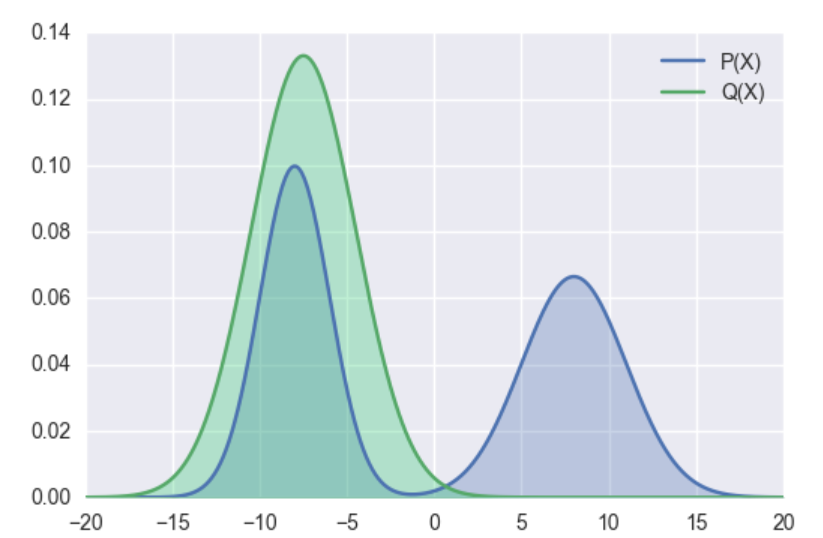

- As you can see above, optimization algorithm will not converge to something like above as KL will be very large as $Q(x) = 0$ where $P(x) \neq 0$. This forces the optimizer to cover the entire support of $P(x)$. It might converge to something like below options

Option1: 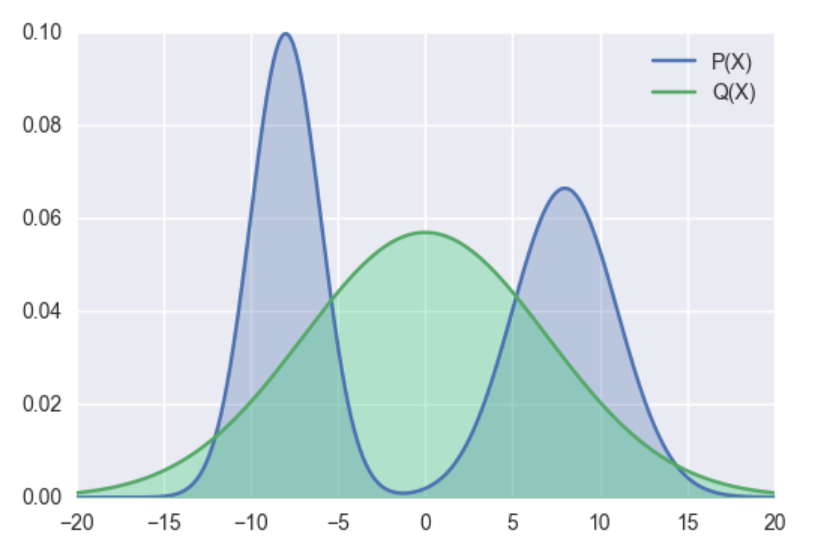

Option 2: 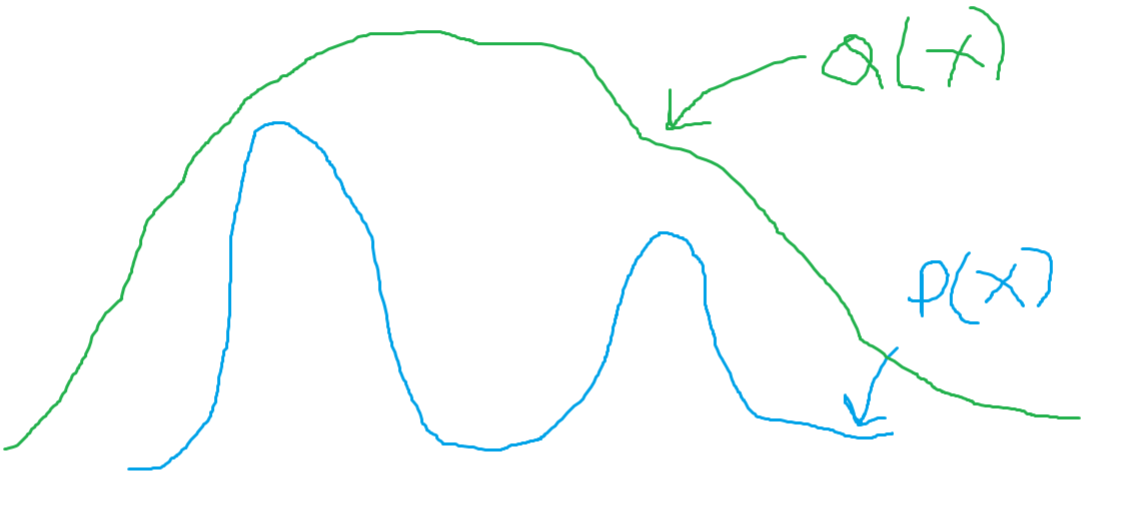

As you can notice from above, forward KL leads to mean seeking behaviour, therefore our prameterized distribution overestimates the true distribution and quality of generated samples will be poor

Now lets look at what happens if we minimize **reverse KL**, $\sum q(x) \log \frac{q(x)}{p(x)}$, now $q(x)$ can be 0 even if $p(x)$ is non-zero, upto optimizer, also if $p(x) = 0 $, then $q(x)$ will be forced to zero so as to minimize KL. Therefore, reverse KL is mode seeking as shown below.

**Bad optimization**: 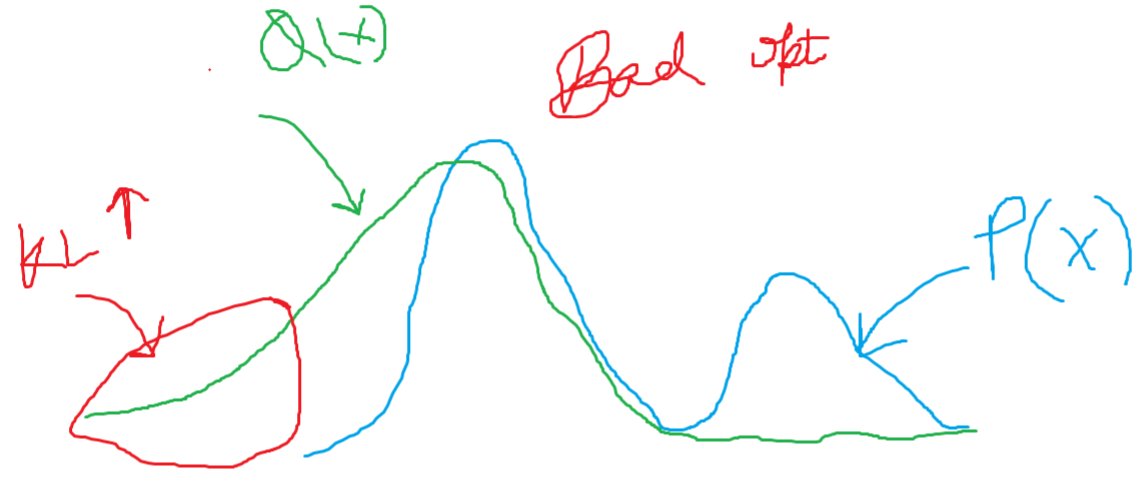

For reverse KL, optimizer will not converge to above scenario as $Q(x)$ is large when $P(x) = 0$ and this will lead to large KL. Instead the optimizer will fit $Q(x)$ to one of the modes as this will lead to minimum KL as shown below

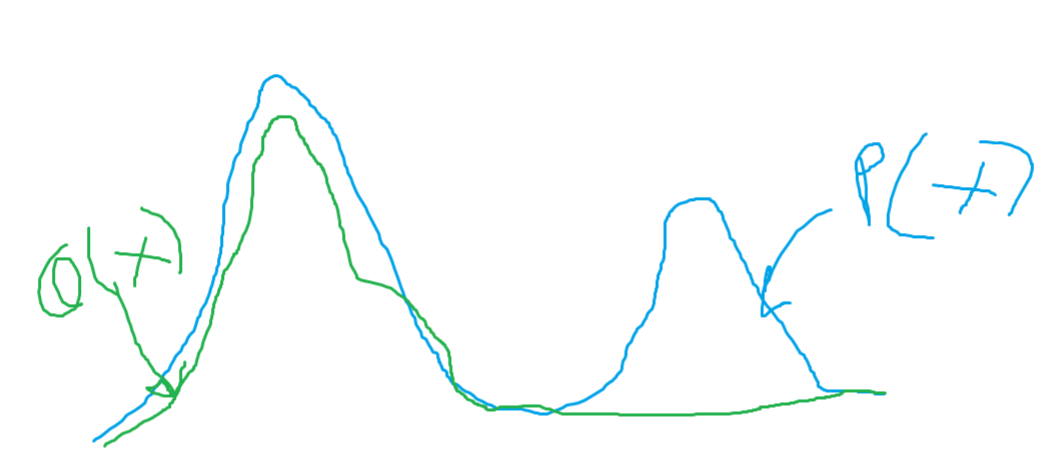

Therefore, reverse KL is used in variational inference using variational autoencoders. Now whether the optimizer will learn one or more mode with reverse KL depends upon the parameteric distribution, you could learn multiple modal parametric distribtuion but number of modes is unknown

### Relation between KL divergence and MLE (maximum likelihood estimate)

Now we show that mimimizing KL divergence is same as maximizing the MLE

$\sum p(x) \log \frac{p(x)}{q_\theta(x)} = \sum p(x) \log \frac{1}{q_\theta(x)} + \sum p(x) \log p(x) $
- We want to mimize LHS w.r.t $\theta$
- The second term is negative of entropy of $p(x)$ and is independent of $\theta$ <br>
$\underset{\theta}{argmin} \sum p(x) \log \frac{p(x)}{q_\theta(x)} = \underset{\theta}{argmin} -\mathbb E \log q_\theta(x) = \underset{\theta}{argmax} \mathbb E \log q_\theta(x)$
- `NOTE:` $q_\theta(x)$ is the joint distribution over the entire dataset, $q_\theta(x_1,x_2,.....x_N)$

**Minimizing KL divergence is same as maximizing MLE**

#### So why not maximize MLE since it is a consistent estimator. Well, notice $q_\theta(x)$ is multi-dimensional parametric distribution and there are following reasons where MLE might be problematic
- We have inductive bias when we parameterize $q_\theta(x)$, for example, unimodal Gaussian or n mixtures of gaussian, each dimension of gaussian RV independent, all these are inductive biases which might be wrong for the underlying data distribution. You can also assume iid samples and can simplify the joint distribution of parameterized $q_\theta(x_1,x_2,.....x_N)$ as $\prod_i q_\theta(x_i)$
- If we have less data at hand, MLE estimate is not good estimate, So for MLE estimation we need lots of data
- Even if we learn parametric distribution $q_\theta(x_1,x_2,.....x_N)$, we still need to compute inverse CDF in order to sample from learned parametric distribution (one additional step - More on this to be added by Sachin??

**So for all above reasons we would like to find some other way to minimize KL or some other variant of KL**

### Generalization of KL divergence measure

`Observe:` KL divergence has $\log$ function and $-\log$ is convex, so we might just get clue to apply tools from convex theory. What if we generalize the definition of KL(p||q)

#### Enters **f-divergence** 
- It is defined as $D_{f}(p||q) = \int q(x) f(\frac{p(x)}{q(x)}) \partial x$, if we chose $f(.)$ as convex function then we may be able to use variational tools in the kitty as we shall see later. Notice that we have replaced $\log$ in KL definition with $f(.)$ which is convex function

Claim: f-divergence == KL divergence when you chose $f(x) = x\log x$ and $x=\frac{p(x)}{q(x)}$

We need another tool: we introduce convex conjugate of a function <br>

#### convex conjugate of a function 
- It is defined as $f^{*}(y) = \underset{x}{\sup} {(y^{T}x - f(x))}$
- `NOTE:` complex conjugate of any function is convex even though corresponding function is non-convex. Since convex conjugate is linear in $y$ and linear function is convex
- Further since $\underset{x}{\sup} \geq $ for any value of $x$, we get $f^{*}(y) = \underset{x}{\sup} {(y^{T}x - f(x))} \geq y^{T}x - f(x)$
- Given any function $f(x)$, convex conjugate is a way of deriving a convex function from $f(x)$
- Also, the way convex conjugate $f^{*}(y)$ is defined, for every value of $y$, we get lot of possible values of $f(y) = (y^{T}x - f(x))$ if we ignore $\underset{x}{\sup}$ just for understanding purpose. So if we remove $\underset{x}{\sup}$ for a moment and just consider a particular value of $x$ for a given $y$, we get one variation of $f(y)$ for that particular $y$. Now if we use different values of $x$ for the same value of $y$, we get multiple possible values of $f(y)$ but now it is not a function since it is one to many mapping, so by taking $\underset{x}{\sup}$, we get our function $f(y)$. So now repeat this arguement for all possible values of $y$, you will get lots of variations of $f(y)$ due to many choices of $x$ for a given $y$. Now taking point wise $\underset{x}{\sup}$ for every value of $y$, you get convex conjugate of the function. However, you have the choice of not taking the $\underset{x}{\sup}$, in that case, you will get multiple variations of $f^{*}(y)$ which lower bounds the function $f^{*}(y)$ itself. This is the idea of variation

**Now you know how to connect convex conjuagte to variational function**, but we want $f(x)$ in terms of variation as we have $f(x)$ in f-divergence, so we need another result

**Result**: If f(x) is convex and closed, then $f^{**}(x) = f(x)$, i.e., convex conjugate of convex conjugate gives back the function itself
- $f(x) = f^{**}(x) = \underset{z}{\sup} {(x^{T}z - f^{*}(z))}$
- Now, we can replace $f(x)$ in f-divergence as follows:
- $D_{f}(p||q) = \int q(x) f(\frac{p(x)}{q(x)}) \partial x$, since we have chose $f(.)$ in f-divergence to be convex, we can now use $f^{**}(x) = f(x)$ property
- Therefore, $D_{f}(p||q) = \int q(x) f(\frac{p(x)}{q(x)}) \partial x = \int q(x) \underset{z}{\sup} {(\frac{p(x)}{q(x)}z - f^{*}(z))} \partial x$. Lets understand the RHS term $\int q(x) \underset{z}{\sup} {(\frac{p(x)}{q(x)}z - f^{*}(z))} \partial x$, in order to evaluate the integral, we first need to evaluate the integrand for computing $\underset{z}{\sup}$ for every possible value of $x$. Now we can't really integrate as $\underset{z}{\sup}$ is point wise over integration variable and is annoying. So how can we move ${\sup}$ outside integration, we turn to another result

**Result for swapping $\sup$ and $\int$** <br>
- $\int q(x) \underset{z}{\sup} {(\frac{p(x)}{q(x)}z - f^{*}(z))} \partial x = \underset{T:X \rightarrow R}{\sup} \int_{X} q(x) {(\frac{p(x)}{q(x)}T(x) - f^{*}(T(x)))} \partial x$ where $T$ is an operator on $x$
- `NOTE:` How we replaced $\underset{z}{\sup}$ with $\underset{T:X \rightarrow R}{\sup}$
- Simplifying further we get, $\int q(x) \underset{z}{\sup} {(\frac{p(x)}{q(x)}z - f^{*}(z))} \partial x = \underset{T:X \rightarrow R}{\sup} \int q(x) {(\frac{p(x)}{q(x)}T(x) - f^{*}(T(x)))} \partial x = \underset{T:X \rightarrow R}{\sup} \int (p(x)T(x) - q(x)f^{*}(T(x))) \partial x$
- We can re-write it as $\int q(x) \underset{z}{\sup} {(\frac{p(x)}{q(x)}z - f^{*}(z))} \partial x = \underset{T:X \rightarrow R}{\sup} \big(\mathbb E_{x \sim p(x)}T(x) - \mathbb E_{x \sim q(x)}f^{*}(T(x))\big)$

**Finally**, we have $D_{f}(p||q) = \int q(x) f(\frac{p(x)}{q(x)}) \partial x = \underset{T:X \rightarrow R}{\sup} \big(\mathbb E_{x \sim p(x)}T(x) - \mathbb E_{x \sim q(x)}f^{*}(T(x))\big) $

Now what $T(x)$ to choose? - Let it be parameterized by $\phi$ where $\phi$ are parameters of neural network, then <br>
$D_{f}(p||q=p_\theta) = \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}T_\phi(x) - \mathbb E_{x \sim p_\theta(x)}f^{*}(T_\phi(x))\big) $ where $E_{x \sim p(x)}$ is over our true samples and $E_{x \sim p_\theta(x)}$ is over our learned distribution. Also, we want to minimize f-divergence, therefore,
$\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}T_\phi(x) - \mathbb E_{x \sim p_\theta(x)}f^{*}(T_\phi(x))\big)$. One more trick you can play, the second expectation is over samples from parameterized distribution $p_\theta$ which can be learned by a neural network whose input is $z$ is sampled from random, normal etc and distribution is transformed by neural network $g_\theta(z)$. We do this so that it is easy to generate samples from learned distribution thorugh this transformation since we can easily generate samples from known distribution like normal or uniform.

- $\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}T_\phi(x) - \mathbb E_{z}f^{*}(T_\phi(g_\theta(z)))\big)$

**Questions:**
- What $T_\phi$ to choose
- What $f$ to choose 

**Ian Goodfellow** chose: <br>
- $T_\phi(x) = \log d_\phi(x)$, he thought of this as a discriminator, that why classifier has $\log$ form
- $f(x) = x \log x - (x+1)\log(x+1)$, therefore $f^{*}(t) = -\log (1-e^{t})$
  

`NOTE:` $f(x) = x \log x - (x+1)\log(x+1)$ is convex since we wanted to use convex function for $D_f$ <br>
- Proof: Take $\nabla f(x)= \log x - \log (x+1)$, take gradient again, we get $\nabla^2 f(x)= \frac{1}{x} - \frac{1}{x+1} \geq 0$, $\forall x > 0$. Hence proved.
- Now, lets find the convex conjugate of $f(x)$, which is given by $\underset{x}{\sup} (yx - f(x)) =  \underset{x}{\sup} (yx - x\log x + (x+1)\log (x+1))$. Fix y and then differentiate w.r.t x to find $\underset{x}{\sup}$ (basically for every $y$, maximize over $x$). $\nabla_x (yx - x\log x + (x+1)\log (x+1)) = y - 1 -\log x + \log (x+1) + 1$, equating $\nabla_x (yx - x\log x + (x+1)\log (x+1)) = 0$ gives $x = \frac{1}{e^{-y}-1}$, substitute this $x$ in $\underset{x}{\sup} (yx - x\log x + (x+1)\log (x+1))$ gives $f^{*}(y) = -\log (1-e^{y})$

**Now**, $\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}T_\phi(x) - \mathbb E_{z}f^{*}(T_\phi(g_\theta(z)))\big) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}T_\phi(x) + \mathbb E_{z} \log (1 - e^{T_\phi(g_\theta(z))}) \big)$, furthur substituting $T_\phi(x) = \log d_\phi(x)$, we get <br>
- $\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}\log d_\phi(x) + \mathbb E_{z} \log (1 - d_\phi(g_\theta(z))) \big)$

**Finally**, notice that optimization may not attain $\underset{\phi}{\sup}$ but achieve some lower bound value <br>
- $\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}\log d_\phi(x) + \mathbb E_{z} \log (1 - d_\phi(g_\theta(z))) \big) \geq \underset{\theta}{\min} \underset{\phi}{\max} \big(\mathbb E_{x \sim p(x)}\log d_\phi(x) + \mathbb E_{z} \log (1 - d_\phi(g_\theta(z))) \big)$

`Goodfellow GAN:` uses following choices
- $T_\phi(x) = \log d_\phi(x)$, he thought of this as a discriminator, that why classifier has $\log$ form
- $f(x) = x \log x - (x+1)\log(x+1)$, therefore $f^{*}(t) = -\log (1-e^{t})$
- f-Divergence  <br>
With this, he gets the following cost function: <br>
$\underset{\theta}{\min}D_{f}(p||p_\theta) = \underset{\theta}{\min} \underset{\phi}{\sup} \big(\mathbb E_{x \sim p(x)}\log d_\phi(x) + \mathbb E_{z} \log (1 - d_\phi(g_\theta(z))) \big) \geq \underset{\theta}{\min} \underset{\phi}{\max} \big(\mathbb E_{x \sim p(x)}\log d_\phi(x) + \mathbb E_{z} \log (1 - d_\phi(g_\theta(z))) \big)$
- Further, with the above choice of $f(x)$, $D_f(p||q) = JSD(p||q) - \log 4$, where $JSD(p||q) = KL(p||(p+q)/2) + KL(q||(p+q)/2)$, JSD being Jensons Shannon divergence

### Optimality of GAN

## Practical problems in GAN training